# Probability and Statistics

In [29]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn  as sns
from matplotlib import pyplot as plt

###  1. Descriptive Statistics

Use a dataset : Iris Dataset. Perform the following tasks:    
 a. Compute the mean, median, and standard deviation for all numerical features.  
 b. Create histograms and boxplots for feature distributions.
 c. Calculate the correlation matrix for the features.
 d. Interpret which features are most correlated with each other.

In [27]:
# import pandas as pd
# from sklearn.datasets import load_iris

# loading the Iris dataset
iris = load_iris()
# created a pandas dataframe to organize the dataset in a readable tabular form
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 

iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
# loading the Iris dataset
# iris = load_iris()
# iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
mean_values = iris_df.mean()
median_values = iris_df.median()
std_values = iris_df.std()

print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nStandard Deviation:")
print(std_values)

Mean values:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Median values:
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Standard Deviation:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


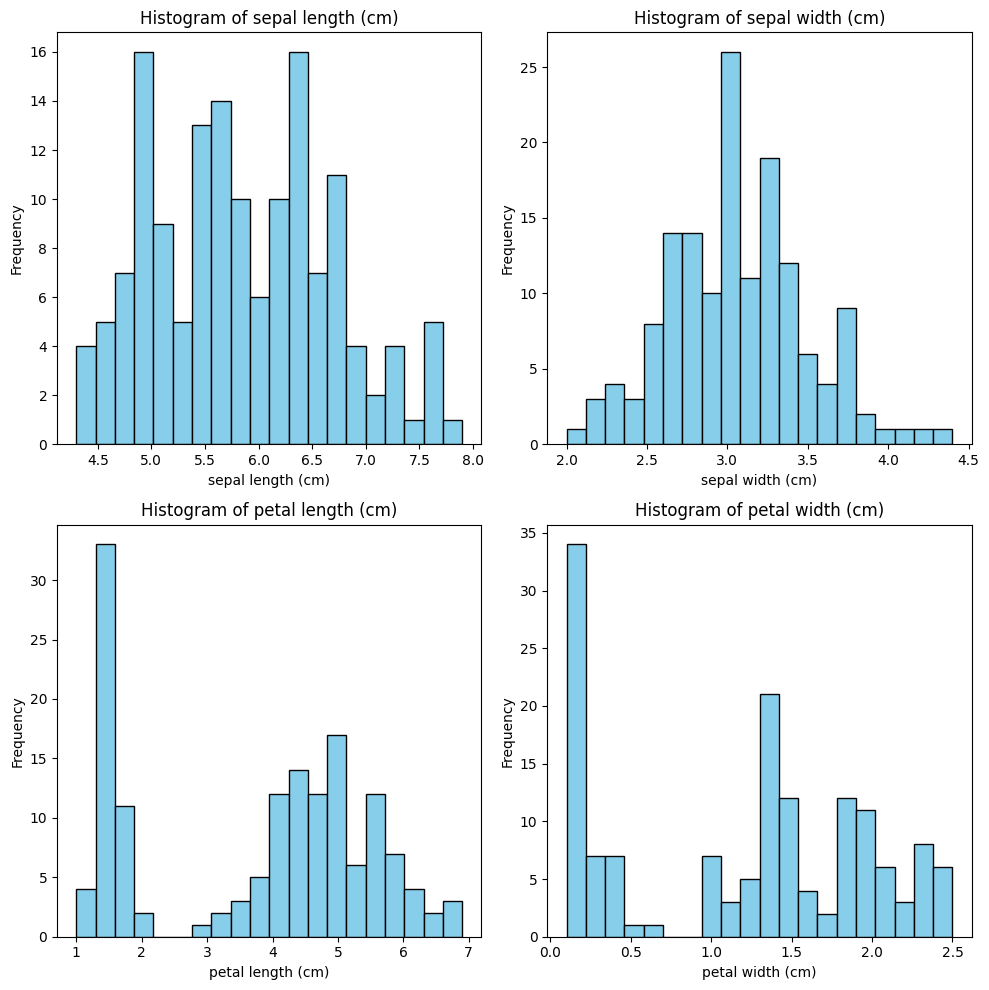

In [38]:
features = iris.feature_names  # list of feature names
plt.figure(figsize=(10, 10))  # to enlarge the plot figure

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a grid of 2x2 subplots and i is the counter for feature
    plt.hist(iris_df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

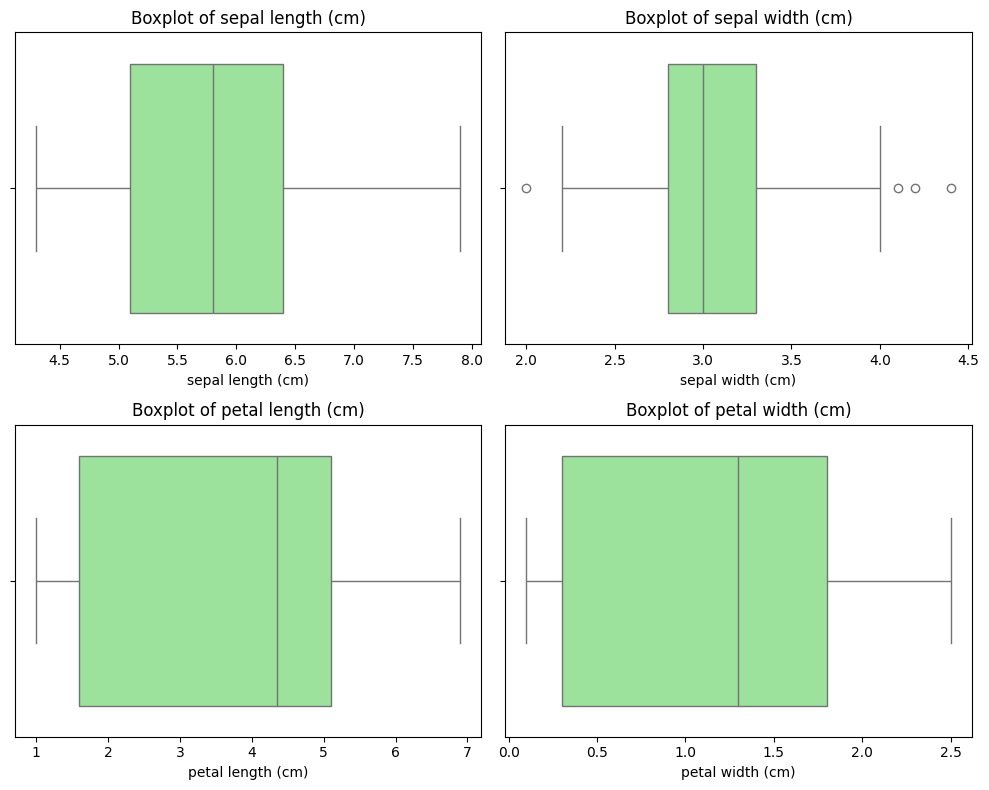

In [ ]:
# for plotting boxplots for all numerical features
plt.figure(figsize=(10, 8))  # Adjust figure size

# to create a boxplot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid for subplots
    sns.boxplot(x=iris_df[feature], color='lightgreen')  # Create boxplot for each feature
    plt.xlabel(feature)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

In [45]:
correlation_matrix = iris_df[iris.feature_names].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


From the above correlation matrix, we can observe the following facts:

    a. Petal length and petal width have the highest correlation (0.96), which shows that the length of a petal increases or decreases along with the change in its width.

    b. There is also a strong correlation between petal length - sepal length (o.871), showing that as the sepal length increases, the petal length increases too, and vice versa.
    
    c. There is a strong correlation between petal width - sepal length (0.817), indicating flowers with longer sepal have wider petals

### 2. Conditional Probability


Given the following table of events, compute P(A∣B) and P(B∣A)

|               |         B         |        not B         |

|  A            |         30        |          20          |

| not A         |         50        |         100          |

In [46]:
A_and_B = 30       
A_and_not_B = 20 
not_A_and_B = 50 
not_A_and_not_B = 100  

# Calculate P(A), P(B), and P(A ∩ B)
P_A = A_and_B + A_and_not_B  
P_B = A_and_B + not_A_and_B  
P_A_and_B = A_and_B  

# Conditional probability P(A|B) = P(A ∩ B) / P(B)
P_A_given_B = P_A_and_B / P_B

# Conditional probability P(B|A) = P(A ∩ B) / P(A)
P_B_given_A = P_A_and_B / P_A

# Display the results
print("P(A|B):", P_A_given_B)
print("P(B|A):", P_B_given_A)

P(A|B): 0.375
P(B|A): 0.6


### 3. Bayes' Theorem

A model classifies spam emails with the following probabilities:

a. P(Spam)=0.2

b. P(Not Spam)=0.8

c. P(Keyword | Spam)=0.7
  
d. P(Keyword | Not Spam)=0.1

Compute the probability that an email is spam given that it contains the keyword.

In [47]:
# Given values
P_Spam = 0.2
P_Not_Spam = 0.8
P_Keyword_given_Spam = 0.7
P_Keyword_given_Not_Spam = 0.1

# Calculate P(Keyword)
P_Keyword = (P_Keyword_given_Spam * P_Spam) + (P_Keyword_given_Not_Spam * P_Not_Spam)

# Applying Bayes' Theorem to calculate P(Spam | Keyword)
P_Spam_given_Keyword = (P_Keyword_given_Spam * P_Spam) / P_Keyword

# Output the result
print("P(Spam | Keyword):", P_Spam_given_Keyword)


P(Spam | Keyword): 0.6363636363636362


### 4. Outlier Detection, Removal, and Feature Scaling

Choose a dataset on your own and perform the following operation

    Compute Q1 (25th percentile) and Q3 (75th percentile) for each feature.
    
    Calculate the IQR (IQR=Q3−Q1).
    
    Define outliers as values outside the range [Q1−1.5⋅IQR,Q3+1.5⋅IQR].
   
    Create a function to detect and remove outliers for all numerical features.
    
    Plot boxplots of features before and after outlier removal.  
    
    Plot histograms of a few features before and after applying normalization and standardization.

Q1, Q3, and IQR for each feature:

Feature: sepal length (cm)
Q1 (25th percentile): 5.10
Q3 (75th percentile): 6.40
IQR: 1.30

Feature: sepal width (cm)
Q1 (25th percentile): 2.80
Q3 (75th percentile): 3.30
IQR: 0.50

Feature: petal length (cm)
Q1 (25th percentile): 1.60
Q3 (75th percentile): 5.10
IQR: 3.50

Feature: petal width (cm)
Q1 (25th percentile): 0.30
Q3 (75th percentile): 1.80
IQR: 1.50



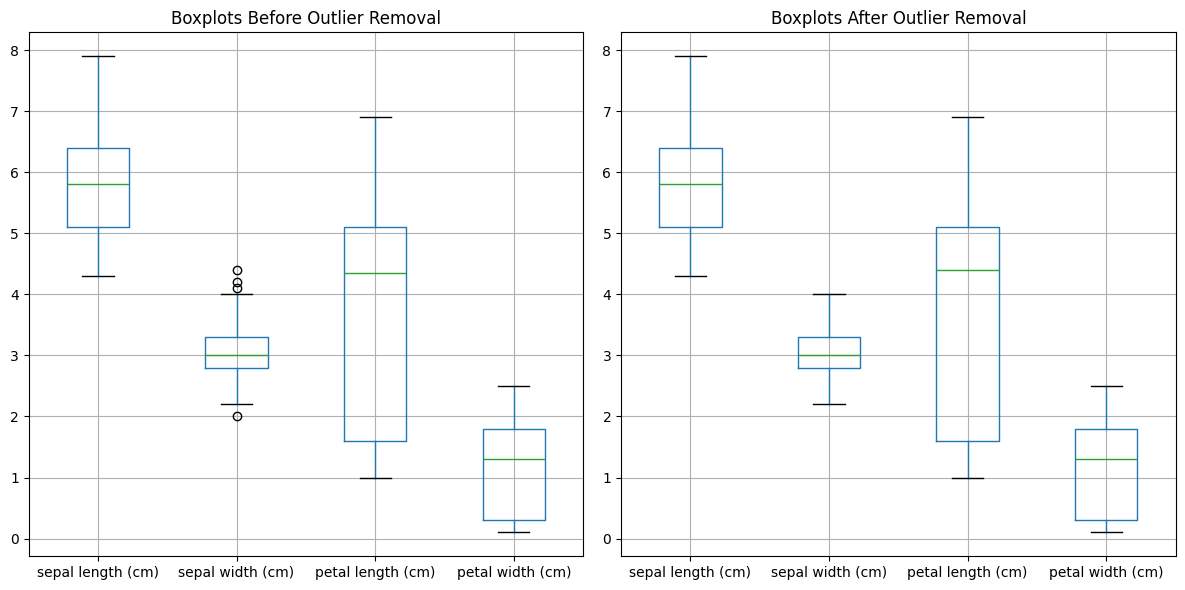

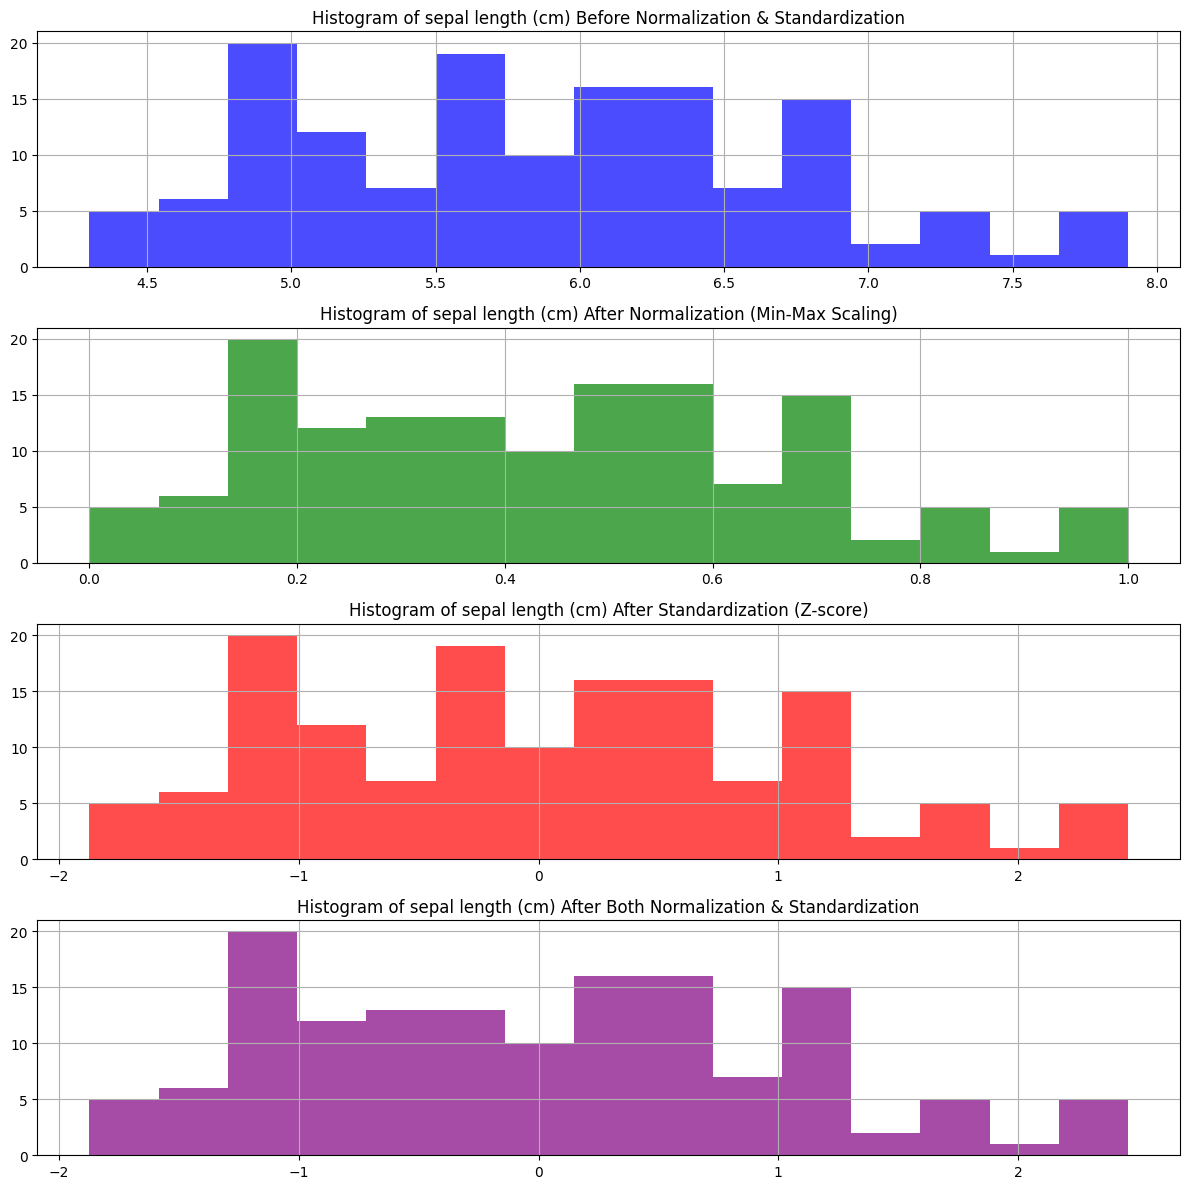

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
q1 = iris_df.quantile(0.25)
q3 = iris_df.quantile(0.75)
iqr = q3 - q1
print("Q1, Q3, and IQR for each feature:\n")
for feature in iris_df.columns:
    print(f"Feature: {feature}")
    print(f"Q1 (25th percentile): {q1[feature]:.2f}")
    print(f"Q3 (75th percentile): {q3[feature]:.2f}")
    print(f"IQR: {iqr[feature]:.2f}\n")
lower_bound = q1 - 1.5 * iqr#calc outliers
upper_bound = q3 + 1.5 * iqr
def remove_outliers(df):#outlier detect ra remove garne func
    for col in df.columns:
        if df[col].dtype != 'object':  # Only process numerical columns
            df = df[(df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])]
    return df
iris_df_cleaned = remove_outliers(iris_df)#data after removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
iris_df.boxplot()
plt.title("Boxplots Before Outlier Removal")
plt.subplot(1, 2, 2)
iris_df_cleaned.boxplot()
plt.title("Boxplots After Outlier Removal")
plt.tight_layout()
plt.show()
#Applying normalization between 0 and 1
scaler_minmax = MinMaxScaler(feature_range=(0, 1)) 
# Normalize the features
normalized = pd.DataFrame(scaler_minmax.fit_transform(iris_df_cleaned), columns=iris.feature_names)
# Applying standardization (Z-score normalization)
scaler_standard = StandardScaler()
# Standardize the features
standardized = pd.DataFrame(scaler_standard.fit_transform(iris_df_cleaned), columns=iris.feature_names)
# Plotting histograms
plt.figure(figsize=(12, 12))
# Plot histograms for one feature before, after normalization, and after standardization
feature = 'sepal length (cm)'
# Before normalization/standardization
plt.subplot(4, 1, 1)
iris_df_cleaned[feature].hist(bins=15, color='blue', alpha=0.7)
plt.title(f"Histogram of {feature} Before Normalization & Standardization")
# After min-max normalization 
plt.subplot(4, 1, 2)
normalized[feature].hist(bins=15, color='green', alpha=0.7)
plt.title(f"Histogram of {feature} After Normalization (Min-Max Scaling)")
# After z-score standardization
plt.subplot(4, 1, 3)
standardized[feature].hist(bins=15, color='red', alpha=0.7)
plt.title(f"Histogram of {feature} After Standardization (Z-score)")
# After both normalization and standardization
plt.subplot(4, 1, 4)
normalized_standardized = pd.DataFrame(scaler_standard.fit_transform(normalized), columns=iris.feature_names)
normalized_standardized[feature].hist(bins=15, color='purple', alpha=0.7)
plt.title(f"Histogram of {feature} After Both Normalization & Standardization")
plt.tight_layout()
plt.show()